In [44]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs = 114 * 1000 #114KHZ
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

def custom_normalization(X_set):
    new_X_set = []
    for X in X_set:
        min = np.min(X)
        max = np.max(X)
        value = max - min
        data_set = []
        for data in X:
           data_set.append(((data - min) / value) + 0)
        new_X_set.append(data_set)
    return new_X_set
        

In [6]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('../data/Result/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('../data/Result/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('../data/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('../data/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('../data/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('../data/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('../data/Result/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('../data/Result/92_CBF_Honda_side2/*_overall.csv')
cycle_1 = glob.glob('../data/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('../data/Result/Human_A/*_overall.csv')
human_B = glob.glob('../data/Result/Human_B/*_overall.csv')
human_C = glob.glob('../data/Result/Human_C/*_overall.csv')
human_D = glob.glob('../data/Result/Human_D/*_overall.csv')
human_E = glob.glob('../data/Result/Human_E/*_overall.csv')
pillar_1 = glob.glob('../data/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('../data/Result/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('../data/Result/Pillar_3/*_overall.csv')
stopper_1 = glob.glob('../data/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('../data/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('../data/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('../data/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('../data/Result/Wall_2/*_overall.csv')
wall_3 = glob.glob('../data/Result/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [16]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
X = car + motorbike + cycle + human + pillar + stopper + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(stopper)*['Stopper'] + len(wall)*['Wall']

print("Car: ",len(car))
print("Motorbike: ",len(motorbike))
print("Cycle: ",len(cycle))
print("Human: ",len(human))
print("Pillar: ",len(pillar))
print("Stopper: ",len(stopper))
# print(len(ventilator))
print("Wall: ",len(wall))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Car:  11465
Motorbike:  2129
Cycle:  302
Human:  1690
Pillar:  9407
Stopper:  2690
Wall:  5032


In [8]:
print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (19629, 90)
X test data :  (13086, 90)
y train data :  (19629,)
y test data :  (13086,)


In [9]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(result, y_test, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']):
    cm = confusion_matrix(result, y_test)
    print(cm)
    recall_set = []
    cm_overall = []
    F1_SCORE_Overall = 0
    for index, value in enumerate(labels):
#         print(index, labels[index])
        precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
        recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
        F1_SCORE = round(f1_score(y_test, result, average='micro',labels=labels[index]),2)
        print(value,"_F1-score:", F1_SCORE)
        
        recall_set.append(recall)
        cm_overall.append(np.append(cm[index], precision))
        
    score = accuracy_score(result, y_test)
    cm_overall.append(np.append(recall_set, score))
#     print(recall_set, cm_overall) 
    sum = np.sum(cm, axis=1)
    cm = cm_overall   
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,7):
        for j in range(0,8):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 7 :
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

In [45]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = custom_normalization(X_train)
normalized_X_test = custom_normalization(X_test)

Accuracy: 0.8226348769677518
[[4093    5  172  258  101   97   52]
 [   0   52   11    6    0    7    1]
 [  48   38  374    6   14   37    1]
 [ 102   12   11  431   99    0    5]
 [ 238    3   52  126 3223   49  223]
 [  79   13   91    7   22  892    6]
 [  50    4    0   17  247   11 1700]]
CAR _F1-score: 0.86
MOTORBIKE _F1-score: 0.82
CYCLE _F1-score: 0.8
HUMAN _F1-score: 0.8
PILLAR _F1-score: 0.82
STOPPER _F1-score: 0.82
WALL _F1-score: 0.84


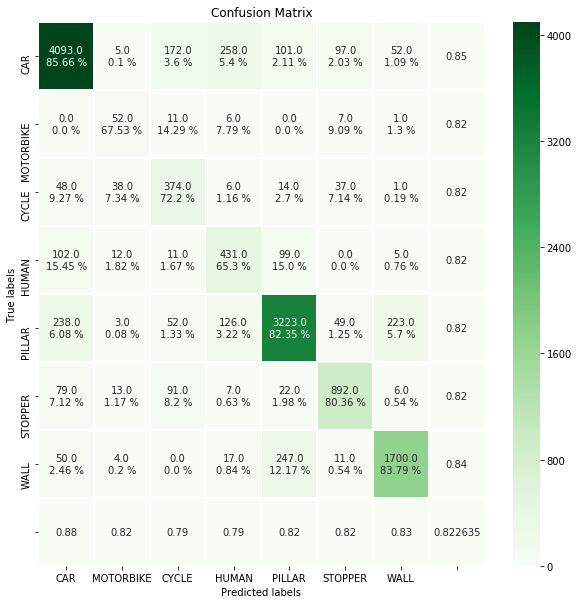

In [58]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(38,32), random_state=12,activation="relu")
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test)

Accuracy: 0.9066177594375668
[[4529   36  268  199   30   76   48]
 [   0   32    1    0    0    0    0]
 [  47   27  302    6    0   16    0]
 [   1    4    6  550    0    0    0]
 [  11    5   32   56 3630   21   88]
 [  20   17  100    5   29  975    6]
 [   2    6    2   35   17    5 1846]]
CAR _F1-score: 0.92
MOTORBIKE _F1-score: 0.91
CYCLE _F1-score: 0.87
HUMAN _F1-score: 0.87
PILLAR _F1-score: 0.9
STOPPER _F1-score: 0.9
WALL _F1-score: 0.88


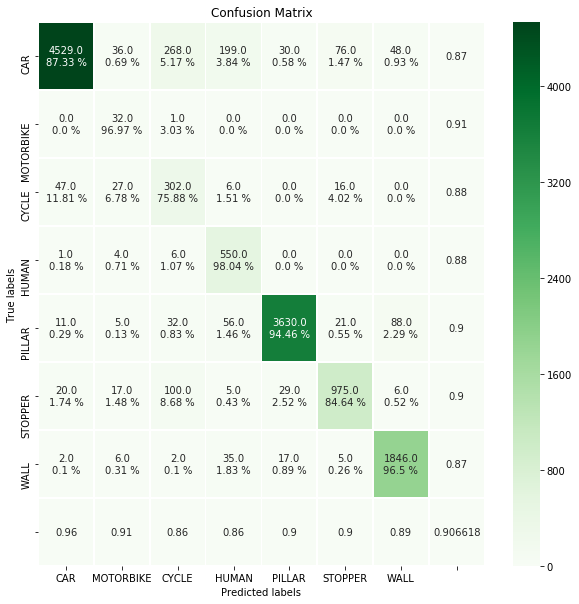

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test)

In [55]:
from sklearn.model_selection import cross_val_score
for i in range(10,40):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(38,i), random_state=12)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 10 score average 0.7142383209747684
hidden layer 11 score average 0.7531140214675803
hidden layer 12 score average 0.758064143392994
hidden layer 13 score average 0.7627508240265297
hidden layer 14 score average 0.7563749679167291
hidden layer 15 score average 0.7848583804962189
hidden layer 16 score average 0.7553050672661187
hidden layer 17 score average 0.7465437743341277
hidden layer 18 score average 0.7483689909600996
hidden layer 19 score average 0.8039625515418807
hidden layer 20 score average 0.7681451174855005
hidden layer 21 score average 0.7890870248759664
hidden layer 22 score average 0.794582929199734
hidden layer 23 score average 0.7829750636401561
hidden layer 24 score average 0.7473597408777339
hidden layer 25 score average 0.735753812454491
hidden layer 26 score average 0.7713015955933321
hidden layer 27 score average 0.7816490948963788
hidden layer 28 score average 0.7816005992974466
hidden layer 29 score average 0.7363587563467668
hidden layer 30 score a